<a href="https://colab.research.google.com/github/emanuel379/Planejamento-de-Experimentos/blob/main/Question%C3%A1rio_1_Planejamento_de_Experimentos_SME0816.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:

Tayane Leandro Guerrero - 11838203

Emanuel Victor da Silva Favorato - 12558151


In [ ]:
# Bibliotecas utilizadas
from scipy.stats import shapiro
from scipy.stats import levene
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestPower

Questão 5 - Considere o problema do teste de dureza uma esfera de aço, que é pressionada contra a superfície de um bloco de material a uma carga padrão. (Aula 3, slide 31).

 Construa gráficos para o poder do teste, variando $alpha$, $n$ e $H_1$, um por vez, fixados os demais.

Você deve apresentar um .pdf com códigos e resultados, utilizando a linguagem de programação de sua preferência.

In [ ]:
# Dados do exercício

esferaA = [7.5, 4.6, 5.7, 4.3, 5.8, 3.2, 6.1, 5.6, 3.4, 6.5]
esferaB = [5.2, 4.1, 4.3, 4.7, 3.2, 4.9, 5.2, 4.4, 5.7, 6.0]
diferenca = [2.3,0.5,1.4,-0.4,2.6,-1.7,0.9, 1.2, -2.3,0.5]

In [ ]:
# Verificando a normalidade para os dois conjuntos de dados
statA, pA = shapiro(esferaA)
statB, pB = shapiro(esferaB)

# Observando os resultados
print('Resultados do teste de Shapiro-Wilk:')
print('Estatística de teste para a esfera A:', statA)
print('Valor-p:', pA)
print('Estatística de teste para a esfera B:', statB)
print('Valor-p:', pB)

# Interpretando os resultados dos testes
alpha = 0.05
if pA > alpha:
    print('Os dados da esfera A parecem seguir uma distribuição normal (não podemos rejeitar H0)')
else:
    print('Os dados da esfera A parecem não seguir uma distribuição normal (rejeitamos H0)')

if pB > alpha:
    print('Os dados da esfera B parecem seguir uma distribuição normal (não podemos rejeitar H0)')
else:
    print('Os dados da esfera B parecem não seguir uma distribuição normal (rejeitamos H0)')

Resultados do teste de Shapiro-Wilk:
Estatística de teste para a esfera A: 0.9569355249404907
Valor-p: 0.7504458427429199
Estatística de teste para a esfera B: 0.9790140390396118
Valor-p: 0.9596737623214722
Os dados da esfera A parecem seguir uma distribuição normal (não podemos rejeitar H0)
Os dados da esfera B parecem seguir uma distribuição normal (não podemos rejeitar H0)


In [ ]:
# Teste de Levene para igualdade de variâncias
stat_var, p_var = levene(esferaA, esferaB)

# Observando os resultados
print('Resultados do teste de Levene:')
print('Estatística de teste:', stat_var)
print('Valor-p =', p_var)

# Interpretando os resultados dos testes
alpha = 0.05
if p_var > alpha:
    print('As amostras aparentam ter a mesma variância (não podemos rejeitar H0)')
else:
    print('As amostras não aparentam ter a mesma variância (rejeitamos H0)')

Resultados do teste de Levene:
Estatística de teste: 1.685171425538689
Valor-p = 0.21062662523567036
As amostras aparentam ter a mesma variância (não podemos rejeitar H0)


Logo, não podemos rejeitar as hipóteses de que os dados são normalmente distribuídos e de mesma variância.

**Gráficos para o poder do teste**

H0: µa - µb = 0.2 mm

H1: µa - µb > 0.2 mm

In [ ]:
# Média da diferença
mu_d = round(np.mean(diferenca), 2)

# Desvio padrão da diferença
sigma_d  = round(np.std(diferenca), 2)

n = len(diferenca)

Variando o  $alpha$

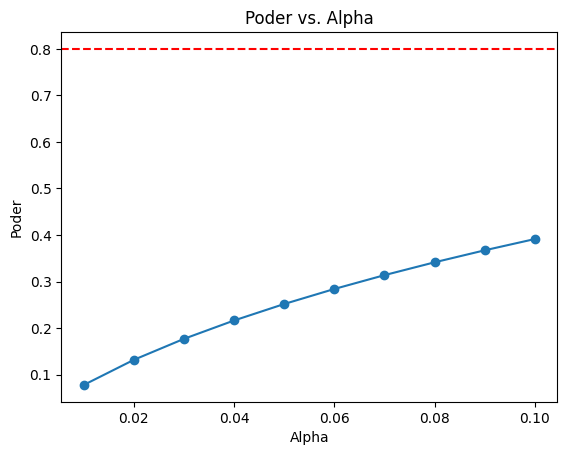

In [ ]:
# Valores de alpha para variar
alphas = np.arange(0.01, 0.11, 0.01)

# Inicializando o objeto TTestPower
analise_poder = TTestPower()

# Vetor para armazenar o poder do teste
valores_poder = []

# Calculando o poder do teste para cada valor de alpha
for alpha in alphas:
    poder = analise_poder.solve_power(effect_size=mu_d/sigma_d, nobs=n, alpha=alpha, alternative='larger')
    valores_poder.append(poder)

# Criando o gráfico
plt.plot(alphas, valores_poder, marker='o')
plt.xlabel('Alpha')
plt.ylabel('Poder')
plt.title('Poder vs. Alpha')
plt.axhline(y=0.8, color='r', linestyle='--')  # Linha horizontal para indicar um poder de 0.8
plt.show()

Variando o $n$

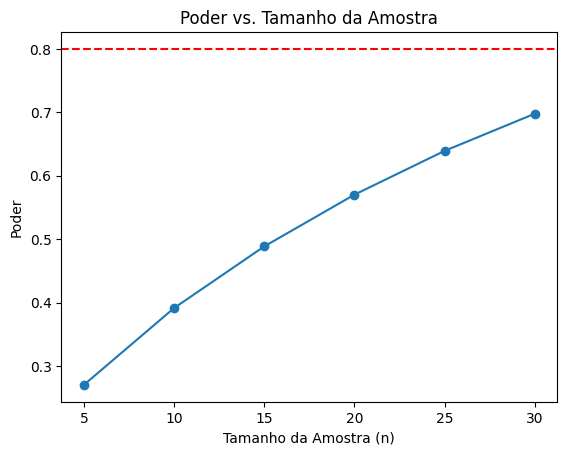

In [ ]:
# Tamanhos de amostra para variar
tamanhos_amostra = np.arange(5, 31, 5)

# Inicializando o objeto TTestPower
analise_poder = TTestPower()

# Vetor para armazenar o poder do teste
valores_poder = []

# Calculando o poder do teste para cada valor de N
for n in tamanhos_amostra:
    poder = analise_poder.solve_power(effect_size=mu_d/sigma_d, nobs=n, alpha=alpha, alternative='larger')
    valores_poder.append(poder)

# Criando o gráfico
plt.plot(tamanhos_amostra, valores_poder, marker='o')
plt.xlabel('Tamanho da Amostra (n)')
plt.ylabel('Poder')
plt.title('Poder vs. Tamanho da Amostra')
plt.axhline(y=0.8, color='r', linestyle='--')  # Linha horizontal para indicar um poder de 0.8
plt.show()

Variando $H_1$

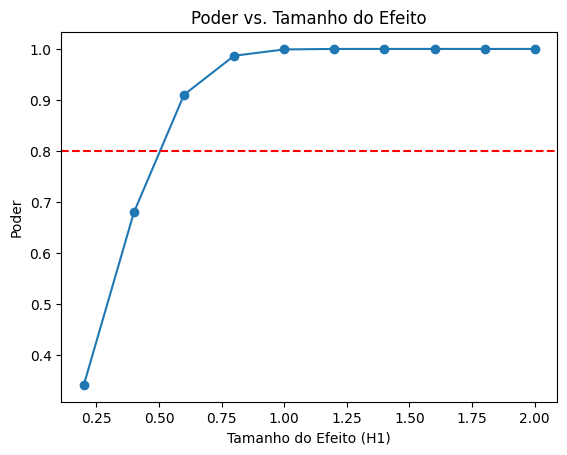

In [ ]:
# Tamanho da amostra fixo para H1
n_fixo = 20

# Valores de H1 (diferença média padronizada) para variar
tamanhos_efeito = np.arange(0.2, 2.1, 0.2)

# Inicialize o objeto TTestPower
analise_poder = TTestPower()

# Vetor para armazenar o poder do teste
valores_poder = []

# Calculando o poder do teste para cada valor de H1
for tamanho_efeito in tamanhos_efeito:
    poder = analise_poder.solve_power(effect_size=tamanho_efeito, nobs=n_fixo, alpha=alpha, alternative='larger')
    valores_poder.append(poder)

# Criando o gráfico
plt.plot(tamanhos_efeito, valores_poder, marker='o')
plt.xlabel('Tamanho do Efeito (H1)')
plt.ylabel('Poder')
plt.title('Poder vs. Tamanho do Efeito')
plt.axhline(y=0.8, color='r', linestyle='--')  # Linha horizontal para indicar um poder de 0.8
plt.show()

In [ ]:
import basedosdados as bd

# Para carregar o dado direto no pandas
df = bd.read_table(dataset_id='br_ibge_pof',
table_id='aluguel_estimado_2017',
billing_project_id="<YOUR_PROJECT_ID>")

In [ ]:
!pip install basedosdados

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.2/135.2 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.0/106.0 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.9/70.9 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━

A partir da análise gráfica, é possível perceber que, aumentando os valores de $alpha$, $n$ e $H1$, observamos um aumento no valor do poder do teste, entretanto, essa váriação não de dá de forma semelhante, sendo mais sensível a $H1$, porém menos abrupta quando variamos $alpha$.